In [101]:

import numpy as np
import matplotlib.pyplot as plt

k=-1
f = lambda y: k*y

y_e = lambda t: np.exp(k*t)




def euler(all_y, h):
    return all_y[-1] + h*f(all_y[-1])


def runge_kutta(all_y, h):
    k1 = f(all_y[-1])
    k2 = f(all_y[-1] + h/2*k1)
    k3 = f(all_y[-1] + h/2*k2)
    k4 = f(all_y[-1] + h*k3)
    return all_y[-1] + h/6*(k1 + 2*k2 + 2*k3 + k4)


def trapezoidal(all_y, h, order=1):
    y = all_y[-1]
    fy = f(y)
    next_y = y + h*fy
    for _ in range(order):
        next_y = y + 1/2 * h * (fy + f(next_y))
    return next_y


def adams_bashforth(all_y, h):
    return all_y[-1] + h/2*(3*f(all_y[-1]) - f(all_y[-2]))


t_max = 10
t_dense = np.linspace(0, t_max, 100)
y_exact = y_e(t_dense)

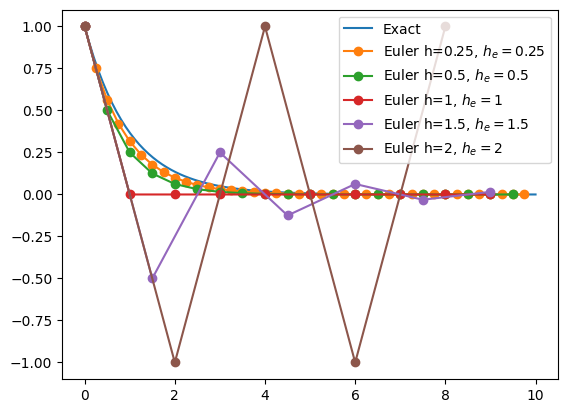

: 

In [113]:


plt.plot(t_dense, y_exact, label='Exact')
for h in [0.25, 0.5, 1, 1.5, 2]:
# for h in np.array([0.5, 1, 1.5, 2])/4:
    all_t = np.arange(0, t_max, h)
    all_y = [y_e(0)]
    for t in all_t[:-1]:
        all_y.append(euler(all_y, h))
    h_effective = h
    plt.plot(all_t, all_y, 'o-', label=f'Euler h={h}, $h_e={h_effective}$')

plt.legend()
plt.show()


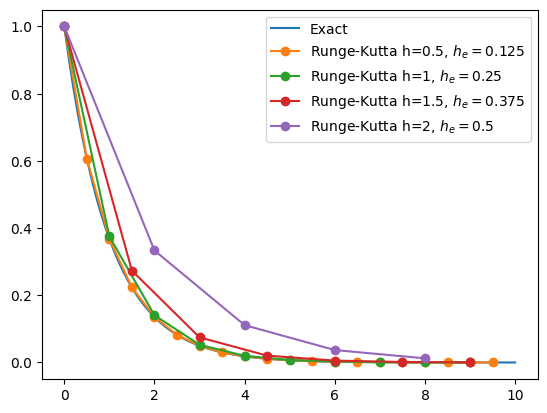

In [107]:

plt.plot(t_dense, y_exact, label='Exact')

for h in [0.5, 1, 1.5, 2]:
    all_t = np.arange(0, t_max, h)
    all_y = [y_e(0)]
    for t in all_t[:-1]:
        all_y.append(runge_kutta(all_y, h))
    h_effective = h/4
    plt.plot(all_t, all_y, 'o-', label=f'Runge-Kutta h={h}, $h_e={h_effective}$')

plt.legend()
plt.show()


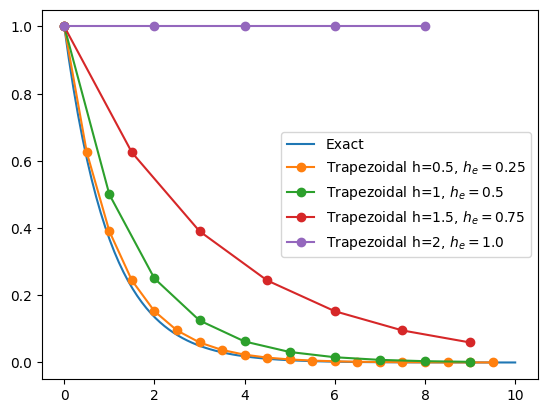

In [104]:

plt.plot(t_dense, y_exact, label='Exact')
order = 1

for h in [0.5, 1, 1.5, 2]:
    all_t = np.arange(0, t_max, h)
    all_y = [y_e(0)]
    for t in all_t[:-1]:
        all_y.append(trapezoidal(all_y, h, order=order))
    
    h_effective = h/(1+order)
    plt.plot(all_t, all_y, 'o-', label=f'Trapezoidal h={h}, $h_e={h_effective}$')

plt.legend()
plt.show()


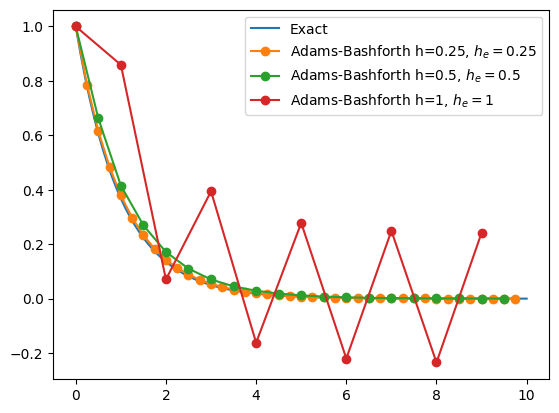

In [112]:

plt.plot(t_dense, y_exact, label='Exact')

for h in [0.25, 0.5, 1]:
    all_t = np.arange(0, t_max, h)
    all_y = [y_e(-h), y_e(0)]
    for t in all_t:
        all_y.append(adams_bashforth(all_y, h))
    h_effective = h
    plt.plot(all_t, all_y[1:-1], 'o-', label=f'Adams-Bashforth h={h}, $h_e={h_effective}$')

plt.legend()
plt.show()



